In [1]:
import pandas as pd

df_swing = pd.read_csv('2008_swing_states.csv')
df_swing[['state', 'county', 'dem_share']]

,state,county,dem_share
0,PA,Erie County,60.08
1,PA,Bradford County,40.64
2,PA,Tioga County,36.07
3,PA,McKean County,41.21
4,PA,Potter County,31.04
...,...,...,...
217,OH,Hamilton County,53.53
218,OH,Highland County,36.54
219,OH,Hocking County,49.58
220,OH,Licking County,41.97


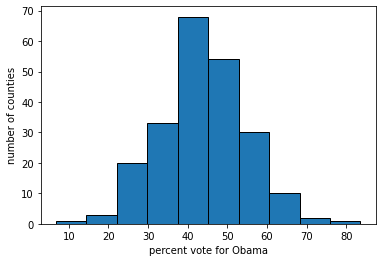

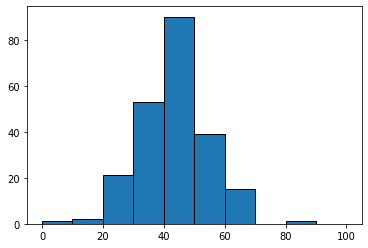

In [13]:
import matplotlib.pyplot as plt

plt.hist(df_swing['dem_share'], edgecolor='black')
plt.xlabel('percent vote for Obama')
plt.ylabel('number of counties')
plt.show()

bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.hist(df_swing['dem_share'], bins=bin_edges, edgecolor='black')
plt.show()

### ***Adjusting the number of bins in a histogram***

The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the ***square root of the number of samples***. 

* จะเห็นว่าการกระจายตัวของข้อมูล เปลี่ยนรูปร่างไปได้ด้วย bins จึงไม่ควรใช้ฮิสโตแกรมแต่เพียงอย่างเดียว

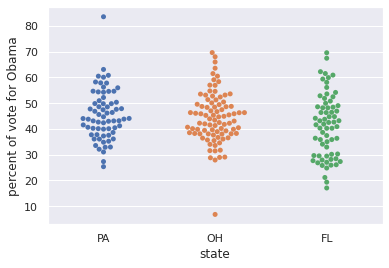

In [18]:
import pandas as pd
import seaborn as sns

sns.set()

df_swing = pd.read_csv('2008_swing_states.csv')

sns.swarmplot(x='state', y='dem_share', data=df_swing)
plt.xlabel('state')
plt.ylabel('percent of vote for Obama')
plt.show()

# ***ECDF***

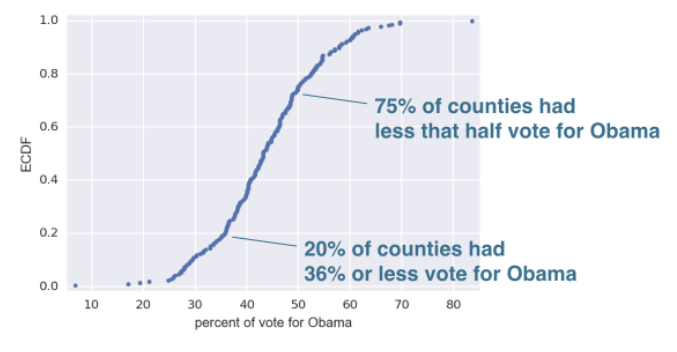


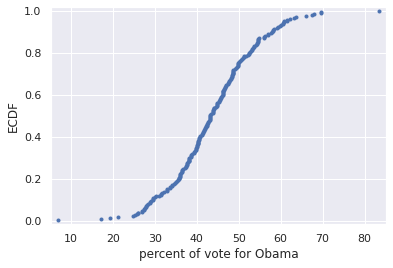

In [27]:
import numpy as np
x = np.sort(df_swing['dem_share'])
y = np.arange(1, len(x)+1) / len(x)

plt.plot(x, y, marker='.', linestyle='none')
#plt.scatter(x, y, marker='.')
plt.xlabel('percent of vote for Obama')
plt.ylabel('ECDF')
plt.margins(0.02) # Keeps data off plot edges
plt.show()

In [28]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# ***Percentile***

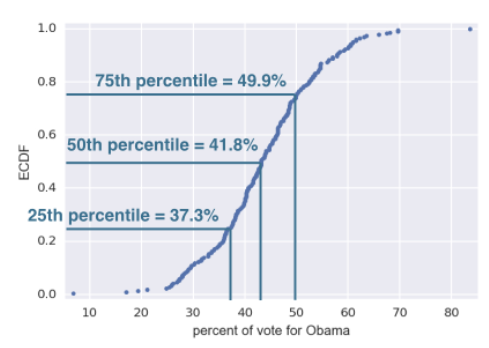

In [1]:
import numpy as np
import pandas as pd

df_swing = pd.read_csv('2008_swing_states.csv')
np.percentile(df_swing['dem_share'], [25, 50, 75])

array([37.3025, 43.185 , 49.925 ])

# ***Box Plot***



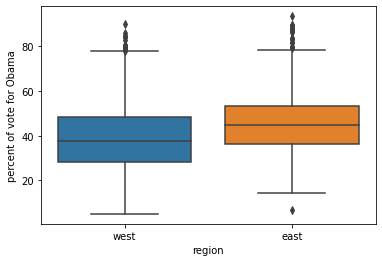

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

df_all_states = pd.read_csv('2008_all_states.csv')
sns.boxplot(x='east_west', y='dem_share', data=df_all_states)
plt.xlabel('region')
plt.ylabel('percent of vote for Obama')
plt.show()

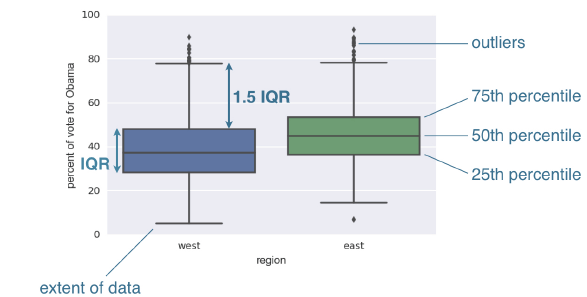

# ***Covariance and Correlation***

* Covariance = $\dfrac{1}{n}\displaystyle\sum_{i=1}^n(x_i-\bar{x})(y_{i}-\bar{y})$

  * ```np.cov()```

* Correlation: $\rho = \dfrac{\text{Covariance}}{(\text{std. of x}) \times (\text{std. of y})}$
  * `np.corrcoef()`

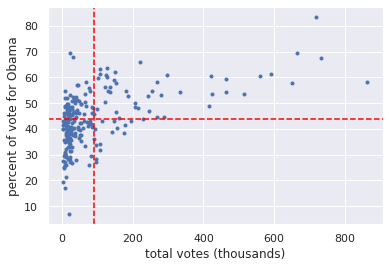

In [10]:
import seaborn as sns

total_votes = df_swing['total_votes']
dem_share = df_swing['dem_share']

sns.set()

plt.plot(total_votes/1000, dem_share, marker='.', linestyle='none')
plt.xlabel('total votes (thousands)')
plt.ylabel('percent of vote for Obama')
plt.axvline(x=(total_votes/1000).mean(), linestyle='--', color='red')
plt.axhline(y=dem_share.mean(), linestyle='--', color='red')
plt.show()

# ***Simulating 4 coin flips***



In [12]:
import numpy as np

np.random.seed(42)
random_numbers = np.random.random(size=4)
print(random_numbers)
heads = random_numbers < 0.5
print(heads)
print(np.sum(heads))

[0.37454012 0.95071431 0.73199394 0.59865848]
[ True False False False]
1


In [ ]:
n_all_heads = 0 # Initialize number of 4-heads trials
for _ in range(10000):
    heads = np.random.random(size=4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        n_all_heads += 1
        
n_all_heads / 10000

### ***Generating random numbers using the np.random module***

* Seed the random number generator using the seed `42`.
* Initialize an empty array, `random_numbers`, of 100,000 entries to store the random numbers. Make sure you use `np.empty(100000)` to do this.
* Write a for loop to draw 100,000 random numbers using `np.random.random()`, storing them in the `random_numbers` array. To do so, loop over `range(100000)`.
* Plot a histogram of `random_numbers`. It is not necessary to label the axes in this case because we are just checking the random number generator. 

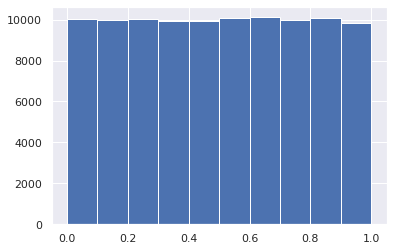

In [13]:
import numpy as np

# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()

The histogram is almost exactly flat across the top, indicating that there is equal chance that a randomly-generated number is in any of the bins of the histogram.

### ***The np.random module and Bernoulli trials***

* Define a function with signature `perform_bernoulli_trials(n, p)`.

  * Initialize to zero a variable `n_success` the counter of `True`s, which are Bernoulli trial successes.
  * Write a `for` loop where you perform a Bernoulli trial in each iteration and increment the number of success if the result is `True`. Perform `n` iterations by looping over `range(n)`.

    * To perform a Bernoulli trial, choose a random number between zero and one using `np.random.random()`. If the number you chose is less than `p`, increment `n_success` (use the `+= 1` operator to achieve this). 
    
* The function returns the number of successes `n_success`.

In [3]:
import numpy as np

def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()
 
        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

### ***How many defaults might we expect?***

Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is `p = 0.05`. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the p`erform_bernoulli_trials()` function you wrote in the previous exercise and record how many defaults we get. Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to `True`, i.e., did the loan recipient default?) You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.

* Seed the random number generator to 42.
* Initialize `n_defaults`, an empty array, using **`np.empty()`**. It should contain `1000` entries, since we are doing 1000 simulations.
* Write a `for` loop with `1000` iterations to compute the number of defaults per 100 loans using the `perform_bernoulli_trials()` function. It accepts two arguments: the number of trials `n` - in this case `100` - and the probability of success `p` - in this case the probability of a default, which is `0.05`. On each iteration of the loop store the result in an entry of `n_defaults`.
* Plot a histogram of `n_defaults`. Include the **`density=True`** keyword argument so that the height of the bars of the histogram indicate the probability.


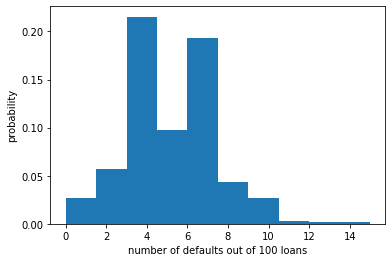

In [4]:
import numpy as np

# Seed radom number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


# Plot the histogram with default number of bins; label your axes
plt.hist(n_defaults, density=True)
plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('probability')

# Show the plot
plt.show()

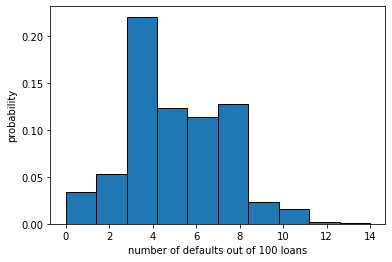

In [9]:
# ฟังก์ชัน perform_bernoulli_trials() ที่ทำผ่าน for 1,000 ก็คือ 
# np.random.binomial(100, 0.05, size=1000)

plt.hist(np.random.binomial(100, 0.05, size=1000), density=True, edgecolor='black')
plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('probability')
plt.show()

This is actually not an optimal way to plot a histogram when the results are known to be integers. 

### ***Will the bank fail?***

Plot the number of defaults you got from the previous exercise, in your namespace as `n_defaults`, as a CDF. The `ecdf()` function you wrote in the first chapter is available.

If interest rates are such that the bank will lose money if `10` or more of its loans are defaulted upon, what is the probability that the bank will lose money?

* Compute the `x` and `y` values for the ECDF of `n_defaults`.

* Plot the ECDF, making sure to label the axes. Remember to include `marker = '.'` and `linestyle = 'none'` in addition to `x` and `y`.
* Compute the total number of entries in your `n_defaults` array that were greater than or equal to `10`. To do so, compute a boolean array that tells you whether a given entry of `n_defaults` is `>= 10`. Then sum all the entries in this array using `np.sum()`. For example, `np.sum(n_defaults <= 5)` would compute the number of defaults with `5` or fewer defaults.
* The probability that the bank loses money is the fraction of `n_defaults` that are greater than or equal to `10`.

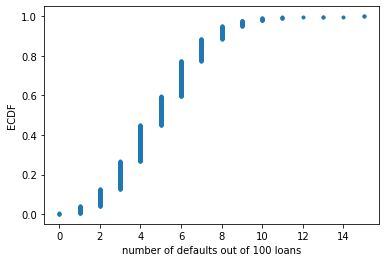

Probability of losing money = 0.022


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def ecdf(data):
    return np.sort(data), np.arange(1, len(data)+1) / len(data)

# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
plt.plot(x, y ,marker='.', linestyle='none')
plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('ECDF')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


We most likely get 5/100 defaults. But we still have about a 2% chance of getting 10 or more defaults out of 100 loans.

# ***Binomial distribution***

* The number $r$ of successes 
* in $n$ Bernoulli trials 
* with probability $p$ of success 
    * is ***Binomially distributed***.

## ***Sampling from the Binomial distribution***

In [12]:
samples = np.random.binomial(60, 0.1, size=1000)

## ***The Binomial CDF***

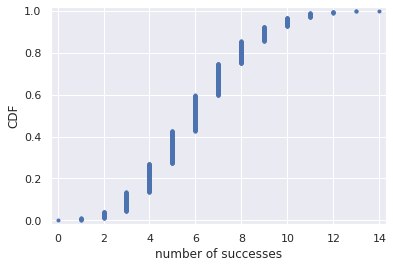

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

x, y = ecdf(samples)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('number of successes')
plt.ylabel('CDF')
plt.show()

### ***Sampling out of the Binomial distribution***

Compute the probability mass function for the number of defaults we would expect for 100 loans as in the last section, but instead of simulating all of the Bernoulli trials, perform the sampling using **`np.random.binomial()`**. This is identical to the calculation you did in the last set of exercises using your custom-written `perform_bernoulli_trials()` function, but far more computationally efficient. Given this extra efficiency, we will take 10,000 samples instead of 1,000. After taking the samples, plot the CDF as last time. This CDF that you are plotting is that of the Binomial distribution.

Note: For this exercise and all going forward, the random number generator is pre-seeded for you (with **`np.random.seed(42)`**) to save you typing that each time.

Draw samples out of the Binomial distribution using **`np.random.binomial()`**. You should use parameters `n=100` and `p=0.05`, and set the **`size`** keyword argument to `10000`.
* Compute the ECDF using your previously-written `ecdf()` function.
* Plot the ECDF with axis labels. The x-axis here is the `number of defaults out of 100 loans`, while the y-axis is the `ECDF`.

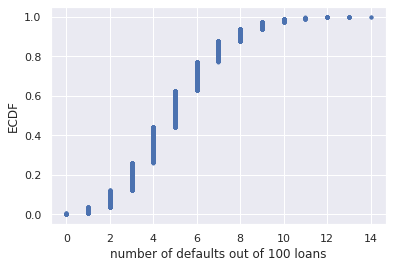

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def ecdf(data):
    return np.sort(data), np.arange(1, len(data)+1) / len(data)

sns.set()
np.random.seed(42)

# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n=100, p=0.05, size=10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('ECDF')
plt.show()

### ***Plotting the Binomial PMF***

As mentioned in the video, plotting a nice looking PMF requires a bit of matplotlib trickery that we will not go into here. Instead, we will plot the PMF of the Binomial distribution as a histogram with skills you have already learned. The trick is setting up the edges of the bins to pass to **`plt.hist()`** via the **`bins`** keyword argument. We want the bins centered on the integers. So, the edges of the bins should be `-0.5, 0.5, 1.5, 2.5, ...` up to `max(n_defaults) + 1.5`. You can generate an array like this using **`np.arange()`** and then subtracting `0.5` from the array.

You have already sampled out of the Binomial distribution during your exercises on loan defaults, and the resulting samples are in the NumPy array `n_defaults`.

* Using **`np.arange()`**, compute the bin edges such that the bins are centered on the integers. Store the resulting array in the variable bins.
* Use **`plt.hist()`** to plot the histogram of `n_defaults` with the **`density=True`** and **`bins=bins`** keyword arguments.

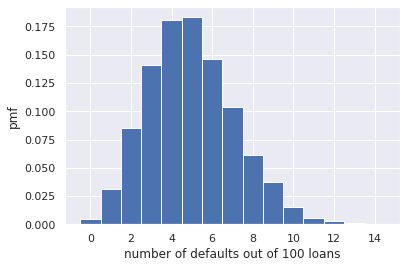

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
np.random.seed(42)

# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n=100, p=0.05, size=10000)

# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
plt.hist(n_defaults, bins=bins, density=True)
plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('pmf')
plt.show()

# ***Poisson distribution***

* The number $r$ of arrivals of a Poisson process 
* in a given time interval with average rate of $\lambda$ arrivals per interval is 
    * Poisson distributed.

## ***The Poisson CDF***


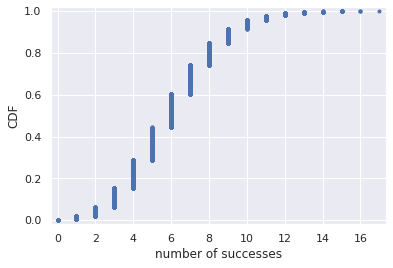

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def ecdf(data):
    return np.sort(data), np.arange(1, len(data)+1) / len(data)

sns.set()
np.random.seed(42)

samples = np.random.poisson(6, size=10000)
x, y = ecdf(samples)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('number of successes')
plt.ylabel('CDF')
plt.show()

### ***Relationship between Binomial and Poisson distributions***

Compute the mean and standard deviation of samples from a Poisson distribution with an arrival rate of 10. Then, compute the mean and standard deviation of samples from a Binomial distribution with parameters $n$ and $p$ such that $np = 10$.

* Using the **`np.random.poisson()`** function, draw `10000` samples from a Poisson distribution with a mean of `10`.

* Make a list of the `n` and `p` values to consider for the Binomial distribution. Choose `n = [20, 100, 1000]` and `p = [0.5, 0.1, 0.01]` so that  is always `10`.

* Using **`np.random.binomial()`** inside the provided `for` loop, draw `10000` samples from a Binomial distribution with each `n`, `p` pair and print the mean and standard deviation of the samples. There are 3 `n`, `p` pairs: `20`, `0.5`, `100`, `0.1`, and `1000`, `0.01`. These can be accessed inside the loop as `n[i], p[i]`.

In [18]:
import numpy as np

np.random.seed(42)

# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]


# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], 10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

Poisson:      10.0186 3.144813832327758
n = 20 Binom: 9.9637 2.2163443572694206
n = 100 Binom: 9.9947 3.0135812433050484
n = 1000 Binom: 9.9985 3.139378561116833


The means are all about the same. The standard deviation of the Binomial distribution gets closer and closer to that of the Poisson distribution as the probability $p$ gets lower and lower.   Poisson distribution is a limit of the Binomial distribution when the probability of success is small and the number of Bernoulli trials is large.

### ***Was 2015 anomalous?***

1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

* Draw `10000` samples from a Poisson distribution with a mean of `251/115` and assign to `n_nohitters`.
* Determine how many of your samples had a result greater than or equal to `7` and assign to `n_large`.
* Compute the probability, `p_large`, of having `7` or more no-hitters by dividing `n_large` by the total number of samples (`10000`).

In [19]:
import numpy as np

np.random.seed(42)

# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size=10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large / 10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.0067


The result is about 0.007. This means that it is not that improbable to see a 7-or-more no-hitter season in a century. We have seen two in a century and a half, so it is not unreasonable.

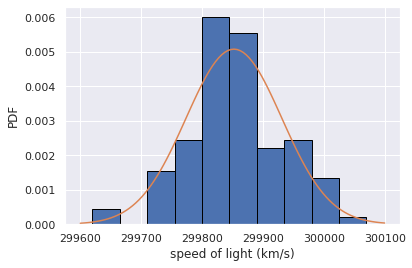

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm


michelson_speed_of_light = pd.read_csv('michelson_speed_of_light.csv').drop(columns='Unnamed: 0')['velocity of light in air (km/s)']

mean = np.mean(michelson_speed_of_light)
std = np.std(michelson_speed_of_light)
samples = np.random.normal(mean, std, size=len(michelson_speed_of_light))

xmin, xmax = 299600, 300100
x = np.linspace(xmin, xmax, 100)
plt.hist(michelson_speed_of_light, edgecolor='black', density=True)
plt.plot(x, norm.pdf(x, mean, std))
plt.xlabel('speed of light (km/s)')
plt.ylabel('PDF')
plt.show()


# ***Normal CDF vs ECDF***

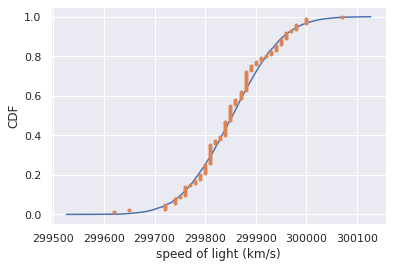

In [49]:
samples = np.random.normal(mean, std, size=10000)
x, y = ecdf(michelson_speed_of_light)
x_theor, y_theor = ecdf(samples)

plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('speed of light (km/s)')
plt.ylabel('CDF')
plt.show()

### ***The Normal PDF***

In this exercise, you will explore the Normal PDF and also learn a way to plot a PDF of a known distribution using hacker statistics. Specifically, you will plot a Normal PDF for various values of the variance.


* Draw 100,000 samples from a Normal distribution that has a mean of `20` and a standard deviation of `1`. Do the same for Normal distributions with standard deviations of `3` and `10`, each still with a mean of `20`. Assign the results to `samples_std1`, `samples_std3` and `samples_std10`, respectively.

* Plot a histograms of each of the samples; for each, use `100` bins, also using the keyword arguments `density=True` and `histtype='step'`. The latter keyword argument makes the plot look much like the smooth theoretical PDF. You will need to make 3 `plt.hist()` calls.

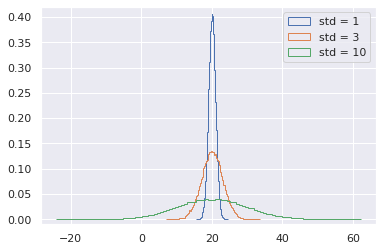

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
sns.set()

# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1, samples_std3, samples_std10 = np.random.normal(20, 1, size=100000), np.random.normal(20, 3, size=100000), np.random.normal(20, 10, size=100000)

# Make histograms
plt.hist(samples_std1, density=True, histtype='step', bins=100)
plt.hist(samples_std3, density=True, histtype='step', bins=100)
plt.hist(samples_std10, density=True, histtype='step', bins=100)

# Make a legend, set limits and show plot
plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


### ***The Normal CDF***

Now that you have a feel for how the Normal PDF looks, let's consider its CDF. Using the samples you generated in the last exercise (in your namespace as `samples_std1`, `samples_std3`, and `samples_std10`), generate and plot the CDFs.

* Use your `ecdf()` function to generate `x` and `y` values for CDFs: `x_std1`, `y_std1`, `x_std3`, `y_std3` and `x_std10`, `y_std10`, respectively.

* Plot all three CDFs as dots (do not forget the marker and linestyle keyword arguments!).



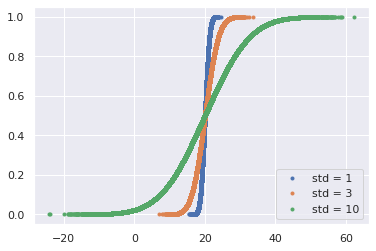

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def ecdf(data):
    return np.sort(data), np.arange(1, len(data)+1) / len(data)

sns.set()
np.random.seed(42)

samples_std1, samples_std3, samples_std10 = np.random.normal(20, 1, size=100000), np.random.normal(20, 3, size=100000), np.random.normal(20, 10, size=100000)

# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
plt.plot(x_std1, y_std1, marker='.', linestyle='none')
plt.plot(x_std3, y_std3, marker='.', linestyle='none')
plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make a legend and show the plot
plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


The CDFs all pass through the mean at the 50th percentile; the mean and median of a Normal distribution are equal. The width of the CDF varies with the standard deviation.

### ***Are the Belmont Stakes results Normally distributed?***

Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, compute the mean and standard deviation of the Belmont winners' times. Sample out of a Normal distribution with this mean and standard deviation using the **`np.random.normal()`** function and plot a CDF. Overlay the ECDF from the winning Belmont times. Are these close to Normally distributed?

* Compute mean and standard deviation of Belmont winners' times with the two outliers removed. The NumPy array `belmont_no_outliers` has these data.

* Take 10,000 samples out of a normal distribution with this mean and standard deviation using **`np.random.normal()`**.

* Compute the CDF of the theoretical samples and the ECDF of the Belmont winners' data, assigning the results to `x_theor`, `y_theor` and `x`, `y`, respectively.



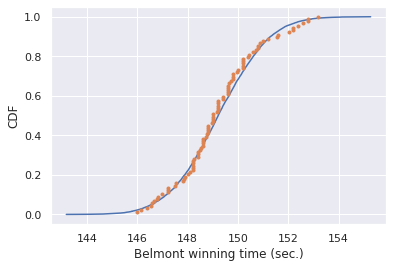

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

def ecdf(data):
    return np.sort(data), np.arange(1, len(data)+1) / len(data)

sns.set()


belmont_no_outliers = np.array([148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ])

# Compute mean and standard deviation: mu, sigma
mu, sigma = np.mean(belmont_no_outliers), np.std(belmont_no_outliers)


# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)


# Plot the CDFs and show the plot
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Belmont winning time (sec.)')
plt.ylabel('CDF')
plt.show()

The theoretical CDF and the ECDF of the data suggest that the winning Belmont times are, indeed, Normally distributed. 

### ***What are the chances of a horse matching or beating Secretariat's record?***

Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), what is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?

* Take 1,000,000 samples from the normal distribution using the **`np.random.normal()`** function. The mean `mu` and standard deviation `sigma` are already loaded into the namespace of your IPython instance.

* Compute the fraction of samples that have a time less than or equal to Secretariat's time of 144 seconds.

In [14]:
mu, sigma = np.mean(belmont_no_outliers), np.std(belmont_no_outliers, ddof=1)

# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are less than 144 seconds: prob
prob = np.sum(samples <= 144)/len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000699


We had to take a million samples because the probability of a fast time is very low and we had to be sure to sample enough. We get that there is only a 0.06% chance of a horse running the Belmont as fast as Secretariat.

### ***The Exponential distribution***

The waiting time between arrivals of a Poisson process, i.e., time between incidents is Exponentially distributed

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

def ecdf(data):
    return np.sort(data), np.arange(1, len(data)+1) / len(data)

mean = np.mean(inter_times)
samples = np.random.exponential(mean, size=10000)
x, y = ecdf(inter_times)
x_theor, y_theor = ecdf(samples)

plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('time (days)')
plt.ylabel('CDF')
plt.show()

### ***If you have a story, you can simulate it!***

In earlier exercises, we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle, when a batter gets all four kinds of hits in a single game, is another rare baseball event. Like no-hitters, this can be modeled as a Poisson process, so the ***time between hits of the cycle are also Exponentially distributed***.

How long must we wait to see a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, ***what is the total waiting time for the arrival of two different Poisson processes in succession?*** The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

* Define a function with call signature `successive_poisson(tau1, tau2, size=1)` that samples the waiting time for a no-hitter and a hit of the cycle.

* Draw waiting times `tau1` (size number of samples) for the no-hitter out of an exponential distribution and assign to `t1`.

* Draw waiting times `tau2` (size number of samples) for hitting the cycle out of an exponential distribution and assign to `t2`.
The function returns the sum of the waiting times for the two events.

In [15]:
import numpy as np

def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

### ***Distribution of no-hitters and cycles***

Now, you'll use your sampling function to compute the waiting time to observe a no-hitter and hitting of the cycle. The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

* Use your `successive_poisson()` function to draw 100,000 out of the distribution of waiting times for observing a no-hitter and a hitting of the cycle.

* Plot the PDF of the waiting times using the step histogram technique of a previous exercise. Don't forget the necessary keyword arguments. You should use **`bins=100`**, **`density=True`**, and **`histtype='step'`**.


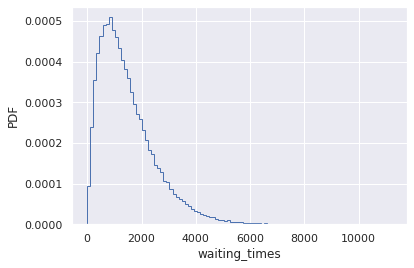

In [17]:
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764, 715, 100000)

# Make the histogram
plt.hist(waiting_times, bins=100, density=True, histtype='step')

# Label axes
plt.xlabel('waiting_times')
plt.ylabel('PDF')
plt.show()


Notice that the PDF is peaked, unlike the waiting time for a single Poisson process. 

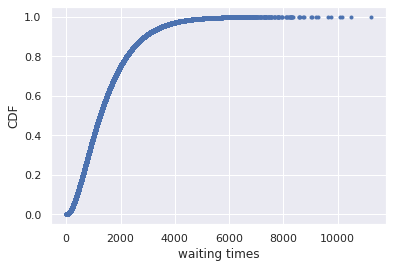

In [18]:
x, y = ecdf(waiting_times)
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('waiting times')
plt.ylabel('CDF')
plt.show()